In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month

sns.set(style="white", context="talk")

## Análisis de productos
Revisaré cuáles son los productos más visitados, más vendidos

### Producto más vendido

Text(0,0.5,'Cantidad de ventas')

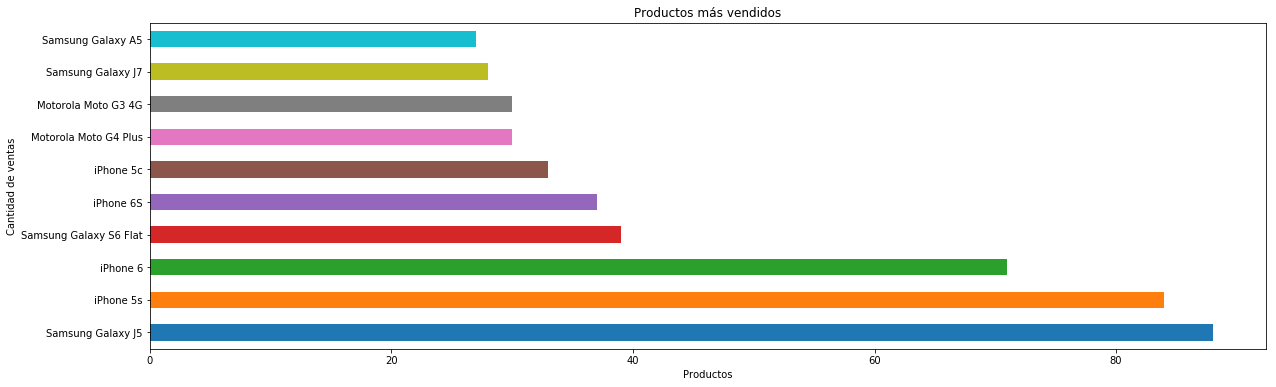

In [36]:
productos_mas_vendidos = data[data['event'] == 'conversion']
graf = productos_mas_vendidos['model'].value_counts().head(10).plot(kind = 'barh', figsize = (20, 6))
graf.set_title('Productos más vendidos')
graf.set_xlabel('Productos')
graf.set_ylabel('Cantidad de ventas')

### Producto más visitado

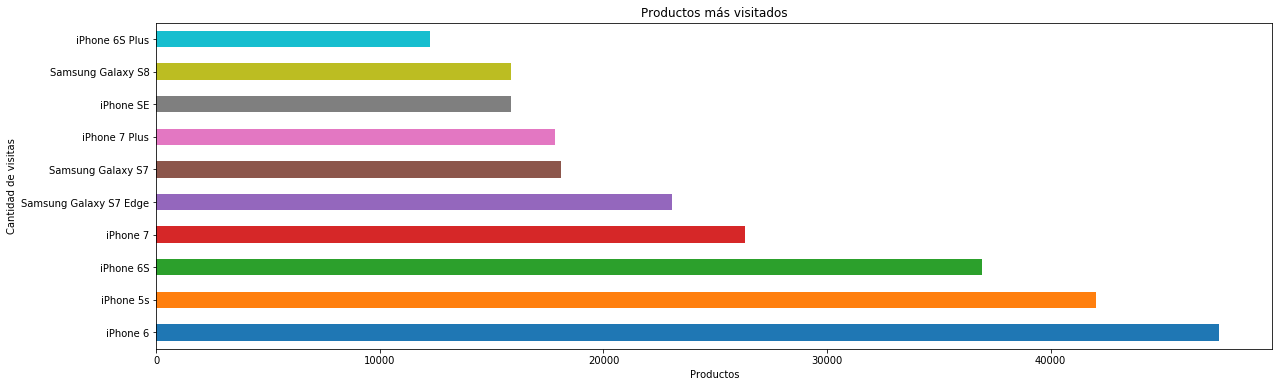

In [35]:
productos_mas_visitados = data[data['event'] == 'viewed product']
graf = productos_mas_visitados['model'].value_counts().head(10).plot(kind = 'barh', figsize = (20, 6))
graf.set_title('Productos más visitados')
graf.set_xlabel('Productos')
graf.set_ylabel('Cantidad de visitas')
graf.set_facecolor('w')

** Los colores no coinciden en ambos gráficos. Ojo **

### Productos con mayor porcentaje de convertibilidad en base a la visita

In [236]:
productos_mas_convertidos = data.groupby('model')['event'].value_counts().to_frame('cantidad').reset_index()
productos_mas_convertidos = productos_mas_convertidos[(productos_mas_convertidos['event'] == 'viewed product')  | (productos_mas_convertidos['event'] == 'conversion')]

productos_mas_convertidos = productos_mas_convertidos.set_index(['model', 'event']).unstack()


## TODO: TERMINAR